# Auto Correlation
```
Shivam Kumaran
sc17b122
date 08/12/2020
Computational Astrophysics
```

In [35]:
import numpy as np 
from fft import fft_freq , compute_fft , compute_ifft
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set_theme('paper')

In [36]:
def shift(x,a):
    l = len(x)
    x = np.asarray(x)
    z = np.zeros(abs(a))
    if(a>0):
        x = np.concatenate((z,x))
        x = x[:l]
    else:
        x = np.concatenate((x,z))
        #print(x)
        x = x[abs(a):]
    return x

def dot(v1,v2):
    return sum([x*y for x,y in zip(v1,v2)])

def cross_corr(x,y):
    m ,n = len(x) , len(y)
    if(m>n):
        z = np.zeros(m-n)
        y = np.concatenate((y,z))
    elif(m<n):
        z = np.zeros(n-m)
        x = np.concatenate((x,z))
    m ,n = len(x) , len(y)
    #res = np.zeros(m+n-1)
    res = []
    del_t = []
    for i in range(-n+1,n):
        temp = dot(shift(y,i) , x)
        #print(temp)
        res.append(temp)
        del_t.append(i)
    return res , del_t


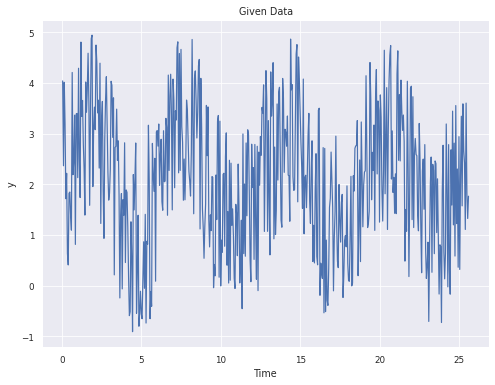

In [37]:
data = np.loadtxt('data-cor')
y = data[:,1]
time = data[:,0]
plt.figure(figsize=(8,6))
plt.plot(time , y)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Given Data')
plt.show()


## Auto-Correlation

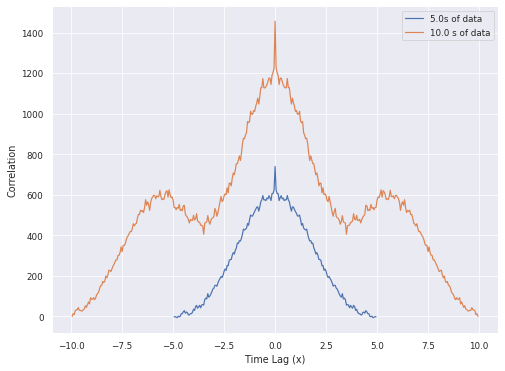

In [38]:
plt.figure(figsize=(8,6))
t1 = [5.0,10.0]
for t_1 in t1:
    del_t = 0.05
    n_t = int(t_1/del_t)
    y_5 = y[:n_t]
    cor_5 , del_t_5 = cross_corr(y_5 , y_5)
    del_t_5 = [t*del_t for t in del_t_5]
    plt.plot(del_t_5 , cor_5)
plt.xlabel('Time Lag (x)')
plt.ylabel('Correlation')
plt.legend(['5.0s of data' , '10.0 s of data'])
plt.show()

## Correlation Using FFT
-- FFT used here is imported from FFT algorithm implement in previous Lab session

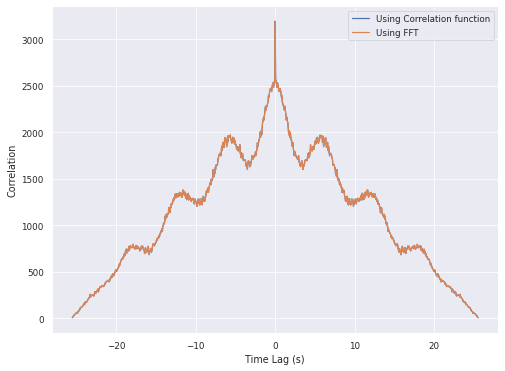

In [39]:
plt.figure(figsize=(8,6))
cx , del_t = cross_corr(y,y)
del_t = [d*0.05 for d in del_t]
plt.plot(del_t , cx)

l = len(y)
y = np.append(y , np.zeros(len(y)))
powspec = compute_fft(y)
pow_sq = [(abs(p))**2 for p in powspec]
c_fft = [x.real for x in compute_ifft(pow_sq)]
c_fft = np.append(c_fft[l+1:2*l], c_fft[:l])
plt.plot(del_t , c_fft) 
plt.legend(['Using Correlation function','Using FFT'])
plt.xlabel('Time Lag (s)')
plt.ylabel('Correlation')
plt.savefig('fft_corr.png')
plt.show()
